## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#The two datasets share 'Mouse ID' so I am going to merge the sets on that column.
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

In [2]:
#This will quickly show me how many unique Mouse IDs there are. 
merged_df['Mouse ID'].nunique()

249

# Check for Duplicate(s) mice and clean the Dataframe

In [3]:
# Checking the number of mice in the DataFrame.
# If we compare a value_count of Mouse ID and Timecount we find that there are 249 unique mice IDs but
# 250 counts at the 0 timepoint (could be at other timepoints as well) so there is a discrepancy there. 
merged_df['Mouse ID'].value_counts()
merged_df['Timepoint'].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
# I need to find the ONE duplicate mouse. There is a function that can search what is duplicated that I will use:
#https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using
#-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
findthedup_df = merged_df[merged_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
findthedup_df
#This is showing that mouse g989 is has duplicated rows up to the 20 timepoint(so 5 total duplicates). We can 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# now I need to drop the duplicate g989 mouse. 
#we can also confirm confirm since the row length decreased from 1893 to 1888. 
clean_df = merged_df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the DataFrame 
clean_df['Mouse ID'].nunique()

249

In [7]:
clean_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

In [8]:
# Checking the number of mice in the clean DataFrame part 2:
#This will show that the mouse we found to be a duplicate has been removed.
doubleclean_df = clean_df.loc[clean_df['Mouse ID'] == 'g989']
doubleclean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [9]:
#Look at possibly doing a group by for each unique mouse by their ID, this will allow me to 
#see their timepoints
groupbyID_df = clean_df.groupby(['Mouse ID','Timepoint'])
groupbyID_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
#Groupby Regimen and then perform a summary stats table
#mean = clean_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen").mean()
#median = clean_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen").median()
#variance = clean_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen").var()
#deviation = clean_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen").std()
#sem = clean_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen").sem()
clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar Plot
1) Generate a bar plot showing the number of mice per time point for 
each treatment throughout the course of the study using pandas.

2) Generate a bar plot showing the number of mice per time point 
for each treatment throughout the course of the study using pyplot. 

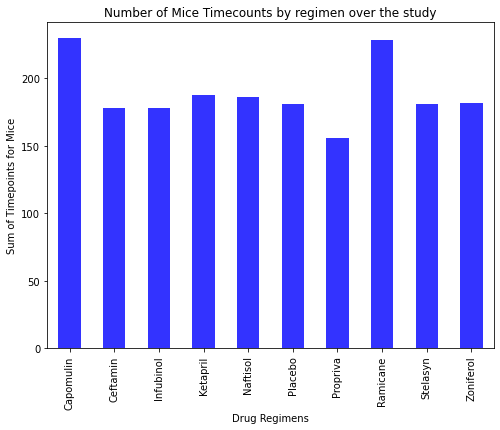

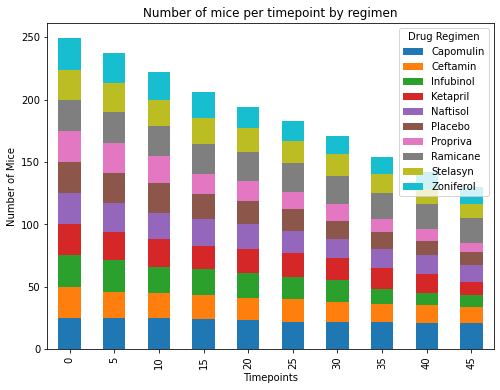

In [11]:
#Pandas
xgroup = clean_df.groupby('Drug Regimen')
ygroup =xgroup['Mouse ID'].count()

plt.figure(figsize=(8,6))
barchart = ygroup.plot(kind="bar", title="Number of Mice Timecounts by regimen over the study", stacked=True,\
                      facecolor='blue',alpha=.8, width = .5)
barchart.set_xlabel("Drug Regimens")
barchart.set_ylabel("Sum of Timepoints for Mice")

# Bonus Second Graph:
# This represents each regimens' mice count over each timepoint.
#https://stackoverflow.com/questions/26683654/making-a-stacked-barchart-in-pandas
aliveovertimegroup = clean_df.groupby(['Timepoint','Drug Regimen'])['Mouse ID'].count().unstack()\
.plot(kind='bar', stacked=True, figsize = (8,6), title = "Number of mice per timepoint by regimen")
aliveovertimegroup.set_ylabel("Number of Mice")
aliveovertimegroup.set_xlabel("Timepoints")
plt.show()

Text(0.5, 0, 'Drug Regimens')

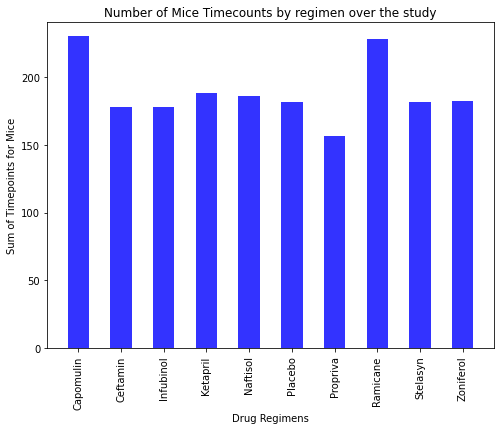

In [12]:
# Pyplot
regimen_count = clean_df["Drug Regimen"].unique()
sort_regimen = regimen_count.sort()
x_axis = np.arange(0,len(regimen_count))
tick_locations = [i for i in x_axis]


plt.figure(figsize=(8,6))
plt.bar(regimen_count, ygroup,alpha=0.8,color='blue',align='center',width=.5)
plt.xticks(tick_locations,regimen_count, rotation='vertical')

plt.xlim=(-0.25,len(x_axis))
plt.ylim(0, max(ygroup) + 10)

plt.title("Number of Mice Timecounts by regimen over the study")
plt.ylabel("Sum of Timepoints for Mice")
plt.xlabel("Drug Regimens")

## Pie Plots
1) Generate a pie plot showing the distribution of female versus male mice using pandas

2) Generate a pie plot showing the distribution of female versus male mice using pyplot

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


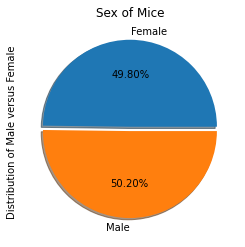

<Figure size 432x288 with 0 Axes>

In [13]:
#Pie plot: Pandas
# Collect the sex breakdown of the mice
sexgroup = clean_df['Mouse ID'].groupby([clean_df['Sex']]).nunique()
print(sexgroup)

# Place the gender keys for that single bike into a list
sex_list = sexgroup.keys()
explode = [0.05,0]

# Create a pie chart based upon sex breakdown
sex_pie = sexgroup.plot(kind="pie", y=sex_list, title= "Sex of Mice",autopct='%2.2f%%',\
                       explode = explode, shadow=True)
sex_pie.set_ylabel("Distribution of Male versus Female")

plt.show()
plt.tight_layout()


Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

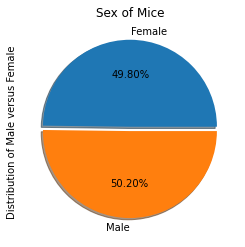

In [14]:
#Pie plot: Pyplot
#https://stackoverflow.com/questions/38309729/count-unique-values-with-pandas-per-groups/38309807
#gendergroup = clean_df['Mouse ID'].groupby([clean_df['Sex']]).nunique()
print(sexgroup)
explode = [0.05,0]
labels = ['Female','Male']
plt.pie(sexgroup, explode=explode, labels=labels, autopct='%2.2f%%',startangle=0,shadow=True)
plt.title("Sex of Mice")
plt.ylabel("Distribution of Male versus Female")

plt.show

## Quartiles, Outliers and Boxplots
1) Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
Calculate the IQR and quantitatively determine if there are any potential outliers. 

2) Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.  
#Find the last column of each Mouse ID
final_tumor = clean_df.groupby('Mouse ID').agg(['last']).stack()
#final_tumor
#Now I need to locate where the drug equals the four most promising: Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_df = final_tumor.loc[(final_tumor['Drug Regimen'] == 'Capomulin')\
                              | (final_tumor['Drug Regimen'] == 'Ramicane')\
                             | (final_tumor['Drug Regimen'] == 'Infubinol')\
                             | (final_tumor['Drug Regimen'] == 'Ceftamin')]
cleanregimen_df = regimen_df.drop(regimen_df.columns[[1,2,3,4,6]], axis=1)
#pd.set_option("display.max_rows", None, "display.max_columns", None)
capomulin_df = cleanregimen_df.loc[cleanregimen_df['Drug Regimen']== 'Capomulin']
ramicane_df = cleanregimen_df.loc[cleanregimen_df['Drug Regimen']== 'Ramicane']
infubinol_df = cleanregimen_df.loc[cleanregimen_df['Drug Regimen']== 'Infubinol']
ceftamin_df = cleanregimen_df.loc[cleanregimen_df['Drug Regimen']== 'Ceftamin']

In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. A lot of this is identical
# to our assignment on IQR. 
tumorvolumecap = capomulin_df['Tumor Volume (mm3)']
tumorvolumeram = ramicane_df['Tumor Volume (mm3)']
tumorvolumeinf = infubinol_df['Tumor Volume (mm3)']
tumorvolumecef = ceftamin_df['Tumor Volume (mm3)']
#quartiles 
quartilescap = tumorvolumecap.quantile([.25,.5,.75])
quartilesram = tumorvolumeram.quantile([.25,.5,.75])
quartilesinf = tumorvolumeinf.quantile([.25,.5,.75])
quartilescef = tumorvolumecef.quantile([.25,.5,.75])
#lower quartiles
lowerqcap = quartilescap[0.25]
lowerqram = quartilesram[0.25]
lowerqinf = quartilesinf[0.25]
lowerqcef = quartilescef[0.25]
#upper quartiles
upperqcap = quartilescap[0.75]
upperqram = quartilesram[0.75]
upperqinf = quartilesinf[0.75]
upperqcef = quartilescef[0.75]
#IQR
iqrcap = upperqcap-lowerqcap
iqrram = upperqram-lowerqcap
iqrinf = upperqinf-lowerqcap
iqrcef = upperqcef-lowerqcap
#Variables for f-strings
a = "-----The lower quartile of tumor volume is:------"
b = "-----The upper quartile of tumor volume is:------"
c = "-----The interquartile range of tumor volume is:-------"
d = "-----The the median of tumor volume is------"
e = "-----Values below could be outliers------"
f = "-----Values above could be outliers------"
#Print out what I want to read out for each drug 
print(f"{a}\nCapomulin: {lowerqcap}\nRamicane: {lowerqram}\nInfubinol: {lowerqinf}\nCeftamin: {lowerqcef}")
print(f"{b}\nCapomulin: {upperqcap}\nRamicane: {upperqram}\nInfubinol: {upperqinf}\nCeftamin: {upperqcef}")
print(f"{c}\nCapomulin: {iqrcap}\nRamicane: {iqrram}\nInfubinol: {iqrinf}\nCeftamin: {iqrcef}")
print(f"{d}\nCapomulin: {quartilescap[0.5]}\nRamicane: {quartilesram[0.5]}\nInfubinol: {quartilesinf[0.5]}\
\nCeftamin: {quartilescef[0.5]}")
#Outlier bounds
lower_boundcap = lowerqcap - (1.5*iqrcap)
upper_boundcap = upperqcap + (1.5*iqrcap)
lower_boundram = lowerqram - (1.5*iqrram)
upper_boundram = upperqram + (1.5*iqrram)
lower_boundinf = lowerqinf - (1.5*iqrinf)
upper_boundinf = upperqinf + (1.5*iqrinf)
lower_boundcef = lowerqcef - (1.5*iqrcef)
upper_boundcef = upperqcef + (1.5*iqrcef)
#print the read outs for the upper and lower bounds for outliers.
print(f"{e}\nCapomulin: {lower_boundcap}\nRamicane: {lower_boundram}\nInfubinol: {lower_boundinf}\nCeftamin: {lower_boundcef}")
print(f"{f}\nCapomulin: {upper_boundcap}\nRamicane: {upper_boundram}\nInfubinol: {upper_boundinf}\nCeftamin: {upper_boundcef}")


-----The lower quartile of tumor volume is:------
Capomulin: 32.37735684
Ramicane: 31.56046955
Infubinol: 54.04860769
Ceftamin: 48.72207785
-----The upper quartile of tumor volume is:------
Capomulin: 40.1592203
Ramicane: 40.65900627
Infubinol: 65.52574285
Ceftamin: 64.29983003
-----The interquartile range of tumor volume is:-------
Capomulin: 7.781863460000004
Ramicane: 8.281649430000002
Infubinol: 33.14838601
Ceftamin: 31.922473189999998
-----The the median of tumor volume is------
Capomulin: 38.125164399999996
Ramicane: 36.56165229
Infubinol: 60.16518046
Ceftamin: 59.85195552
-----Values below could be outliers------
Capomulin: 20.70456164999999
Ramicane: 19.137995404999998
Infubinol: 4.326028674999989
Ceftamin: 0.8383680650000045
-----Values above could be outliers------
Capomulin: 51.83201549
Ramicane: 53.081480415
Infubinol: 115.24832186500001
Ceftamin: 112.18353981499999


Text(0.5, 0, 'Drug Regimens')

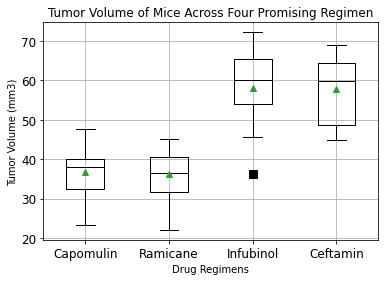

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
# I am thinking I want to make a new variable and convert it to a dictionary, the link above goes that route
# and I think I favor it. 
box_df = pd.DataFrame({"Capomulin":tumorvolumecap,"Ramicane":tumorvolumeram,\
                       "Infubinol":tumorvolumeinf,"Ceftamin":tumorvolumecef})
# style
style = dict(markerfacecolor='black', markersize='8', marker = 's')
#Now make a boxplot variable calling the columns from the new DF with some other formatting:
boxplot = box_df.boxplot(['Capomulin','Ramicane','Infubinol','Ceftamin'],fontsize=12,color='k',\
                         showmeans=True, flierprops = style)
# Set title and labels
boxplot.set_title('Tumor Volume of Mice Across Four Promising Regimen')
boxplot.set_ylabel('Tumor Volume (mm3)')
boxplot.set_xlabel('Drug Regimens')

## Line and Scatter Plots
1) Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

2) Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

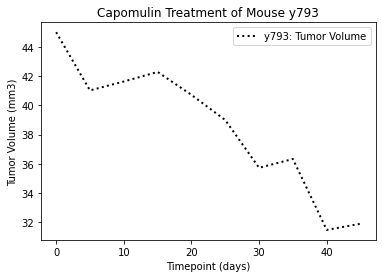

In [143]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# I need to line plot this dataframe: capomulin_df --These are all the mice on Capomulin, I need to pick one
mousetumor = clean_df.loc[clean_df['Mouse ID'] == 'y793']
tumorvol = mousetumor["Tumor Volume (mm3)"]
time = mousetumor['Timepoint']
#plot the line graph and add some style/formatting
poormouse, =plt.plot(time, tumorvol, linewidth=2, color='black', label='y793: Tumor Volume', linestyle = ':')
#Label 
plt.title("Capomulin Treatment of Mouse y793")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")   
plt.legend(handles=[poormouse], loc="best") 

Text(0, 0.5, 'Average Tumor Volume (mm3)')

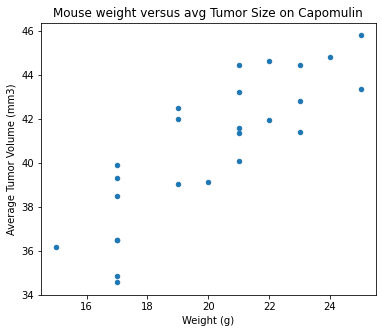

In [239]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Variables/Columns = Weight and Average Tumor Size  
fullcapo = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
weightvstumor = fullcapo.groupby("Mouse ID").agg({'Tumor Volume (mm3)': ['mean'], 'Weight (g)':['mean']})
weightvstumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=False, figsize=(6,5),
              title="Mouse weight versus avg Tumor Size on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression
1) Calculate the correlation coefficient and linear regression model 
for mouse weight and average tumor volume for the Capomulin regimen

The correlation coefficient between weight and tumor volume is: 0.84
The slope and intercept are: 0.95 , 21.55


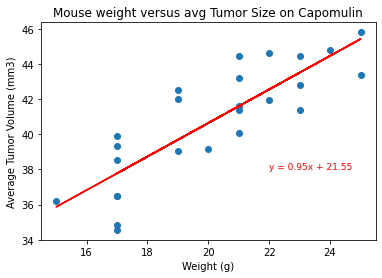

In [243]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weightvstumor['Weight (g)']
y_values = weightvstumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values['mean'],y_values['mean'])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(22,38), fontsize=9,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse weight versus avg Tumor Size on Capomulin")
print(f'The correlation coefficient between weight and tumor volume is: {round((rvalue),2)}')
print(f'The slope and intercept are: {round((slope),2)} , {round((intercept),2)}')